<a href="https://colab.research.google.com/github/AbhinavJangra29/Abhinav-Jangra/blob/main/simpleselfattention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 1: take a input sentence, tokenize it, get its word vectors of 1x3 for simplicity

In [1]:
! pip install nltk

In [8]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:

from nltk import word_tokenize
from nltk.corpus import stopwords
import string


input = "roxy is such a good girl"
stop = set(stopwords.words('english') + list(string.punctuation))


tokens=[i for i in word_tokenize(input.lower()) if i not in stop]
print(tokens)

['roxy', 'good', 'girl']


get  word vectors

In [21]:
#lets keep it a random 1x3 tensor for each word
random_seed=69
import numpy as np

def assign_random_vector(tokens):
    token_vectors = {}
    for token in tokens:
        random_vector = np.random.rand(1, 3)  # Generate a random 1x3 numpy array
        token_vectors[token] = random_vector
    return token_vectors

In [22]:
token_vectors=assign_random_vector(tokens)
print(token_vectors)

{'roxy': array([[0.15503891, 0.8962459 , 0.10829732]]), 'good': array([[0.95598712, 0.08047887, 0.76275051]]), 'girl': array([[0.63581577, 0.28139331, 0.83982567]])}


stack all the vectors onto one another

In [23]:
stacked_matrix = np.vstack([vector for vector in token_vectors.values()])

In [24]:
print(stacked_matrix)

[[0.15503891 0.8962459  0.10829732]
 [0.95598712 0.08047887 0.76275051]
 [0.63581577 0.28139331 0.83982567]]


each word is a node in fully connected directed graph- andrej karpathy

now for the stacked matrix (which represents all words in our vocab) we calculate q,k,v for each word(node in the graph)

In [27]:
Wq=np.random.rand(3,3)
Wk=np.random.rand(3,3)
Wv=np.random.rand(3,3)

In [28]:
print(Wq,Wk,Wv)

[[0.19039905 0.62567403 0.46446858]
 [0.86504734 0.19146158 0.50501238]
 [0.96436436 0.88123125 0.15093924]] [[0.17087188 0.41273722 0.48800979]
 [0.89169211 0.32384446 0.53377986]
 [0.65850978 0.30317897 0.87763473]] [[0.97369459 0.95664173 0.41769685]
 [0.69069799 0.61660912 0.95975347]
 [0.38921426 0.67872573 0.05723944]]


In [29]:
def multiply_with_qkv(token_vectors, Wq, Wk, Wv):
    result_q = np.dot(token_vectors, q)
    result_k = np.dot(token_vectors, k)
    result_v = np.dot(token_vectors, v)
    return result_q, result_k, result_v

In [33]:
q,k,v=multiply_with_qkv(stacked_matrix,Wq,Wk,Wv)
print(q)

[[0.74498071 0.96650935 0.8392654 ]
 [1.53667848 1.41576773 1.33844951]
 [1.40290551 1.35613324 1.21136321]]


In [34]:
print(k)

[[0.72370998 0.52192564 0.386176  ]
 [1.35861945 0.61529463 0.84605442]
 [1.19880291 0.60564119 0.95776783]]


In [35]:
print(v)

[[0.93083346 0.50651141 0.71733392]
 [0.71230424 1.07280347 1.34425902]
 [0.89388417 0.92436777 1.22134143]]


lets calculate the attention score, by having q,k,v matrices we can calc the attention score at a time for the whole vocab thats crazzy

In [40]:
kt=k.transpose()

In [41]:
print(kt)

[[0.72370998 1.35861945 1.19880291]
 [0.52192564 0.61529463 0.60564119]
 [0.386176   0.84605442 0.95776783]]


intrestingness as karpathy calls it


In [43]:
intrestingness=np.dot(q,kt)
print(intrestingness)

[[1.36770014 2.3168975  2.28226432]
 [2.36791211 4.09127669 3.98154578]
 [2.19089683 3.76531541 3.66334207]]


lets scale down the interesting so that for a large graph it doesnt blasts

In [46]:
scaled_interest=intrestingness/3
print(scaled_interest)

[[0.45590005 0.77229917 0.76075477]
 [0.78930404 1.3637589  1.32718193]
 [0.73029894 1.25510514 1.22111402]]


lets scale it more using softmax and also to dive into probablity domain

In [47]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

softmaxed_intrestingness=softmax(scaled_interest)

In [48]:
print(softmaxed_intrestingness)

[[0.0637663  0.0874987  0.08649439]
 [0.08899933 0.15807723 0.15239971]
 [0.08389984 0.14180175 0.13706275]]


we have found the probable interestingness of each node with all other nodes, now lets find out how much each node pays attention to each other node by multiplying v, which in my analogy means the willingness of each node to offer something(more like the weight of the edge between nodes)

In [49]:
attention_weights=np.dot(softmaxed_intrestingness,v)

In [50]:
print(attention_weights)

[[0.19899747 0.2061199  0.26900184]
 [0.33167032 0.35553835 0.46247106]
 [0.30162099 0.32131802 0.41820289]]


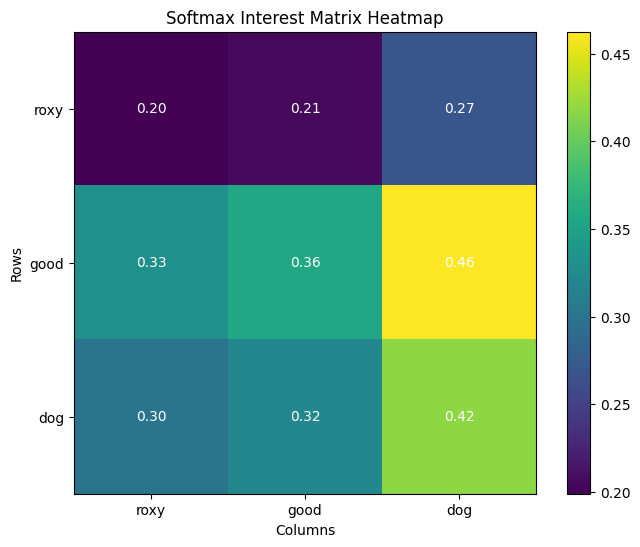

In [51]:
import numpy as np
import matplotlib.pyplot as plt


# Define row and column labels
row_labels = ['roxy', 'good', 'dog']
column_labels = ['roxy', 'good', 'dog']

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(attention_weights, cmap='viridis', interpolation='nearest')

# Add color bar
plt.colorbar()

# Add labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, "{:.2f}".format(attention_weights[i, j]), ha='center', va='center', color='white')

plt.xticks(np.arange(len(column_labels)), column_labels)
plt.yticks(np.arange(len(row_labels)), row_labels)

plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Softmax Interest Matrix Heatmap')

plt.show()


our aim is to optimise this heat map to the best we could by backpropogating and changing Wq,Wk,Wv

multihead attention simply means instead of having single triple of Wq,Wk,Wv you have a loads and you aggregate all of the attention map to a single one to calculate attention weights

In [52]:
k

array([[0.72370998, 0.52192564, 0.386176  ],
       [1.35861945, 0.61529463, 0.84605442],
       [1.19880291, 0.60564119, 0.95776783]])